# GraphUQ Demo - Bipartite Graph-based Uncertainty Quantification

Here's the basic setup

In [1]:
# GraphUQ Demo - Bipartite Graph-based Uncertainty Quantification
# This notebook demonstrates the GraphUQScorer for claim-level uncertainty quantification

from uqlm.longform.black_box.graphuq import GraphUQScorer
from langchain_google_vertexai import ChatVertexAI
import logging

# Configure logging to see very detailed output specifically from graphuq
logging.basicConfig(level=logging.WARNING, format="%(name)s - %(levelname)s - %(message)s")
logging.getLogger("uqlm.longform.black_box.graphuq").setLevel(logging.DEBUG)

# Initialize the LLM and GraphUQScorer
judge_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0)
nli_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0, logprobs=True)

# Initialize the GraphUQScorer
graphuq_scorer = GraphUQScorer(judge_llm=judge_llm, nli_llm=nli_llm, max_calls_per_min=250)

uqlm.longform.black_box.graphuq - INFO - Initialized GraphUQScorer


Define some toy data

In [2]:
responses = [
    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ]
]

original_claim_sets = [
    ["The sky is blue.", "The grass is green."]
]

sampled_claim_sets = [
    [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ]
]

entailment_score_sets = [{"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]}]

Run the evaluation

uqlm.longform.black_box.graphuq - DEBUG - Starting evaluation for 1 response sets.
uqlm.longform.black_box.graphuq - DEBUG - Step 1: Deduplicating claims for all response sets...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Initial master claim set size: 2
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Master claim set size after dedup: 4
uqlm.longform.black_box.graphuq - DEBUG - Step 2: Computing adjacency matrices for all response sets...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Computing entailment scores for master claim set...
uqlm.longform.black_box.graphuq - DEBUG - Executing 0 NLI predictions concurrently...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Biadjacency matrix shape: (4, 4)
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Filtered 0 edges below threshold 0.001
uqlm.longform.black_box.graphuq - DEBUG - Step 3: Constructing graphs and calculating scores for all response sets...
uqlm.longform.black_box.

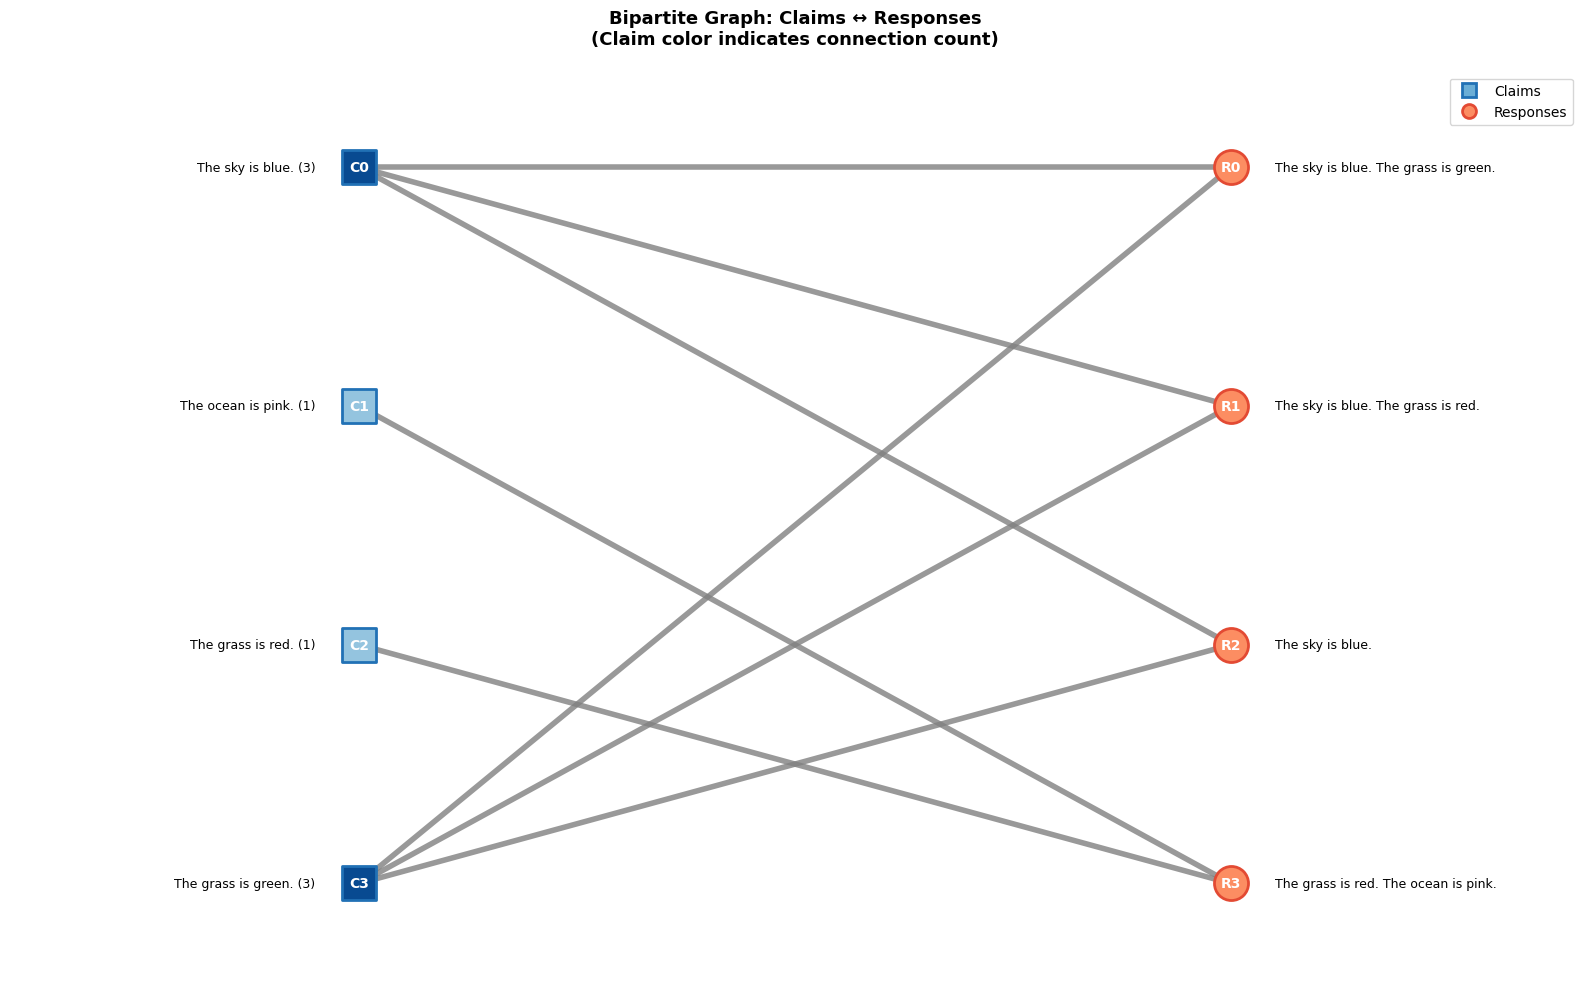

RESULTS
 --------------------
Query 1:
{
    "claim": "The sky is blue.",
    "original_response": true,
    "scores": {
        "degree_centrality": 0.75,
        "betweenness_centrality": 0.08333,
        "closeness_centrality": 0.8,
        "harmonic_centrality": 1.0,
        "page_rank": 0.15372,
        "eigenvector_centrality": 1.0,
        "katz_centrality": 1.0,
        "hits_authority": 1.0
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The ocean is pink.",
    "original_response": false,
    "scores": {
        "degree_centrality": 0.25,
        "betweenness_centrality": 0.0,
        "closeness_centrality": 0.66667,
        "harmonic_centrality": 0.42857,
        "page_rank": 0.09628,
        "eigenvector_centrality": 0.00001,
        "katz_centrality": 0.98019,
        "hits_authority": 0.0
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The grass is red.",
    "original_response": false,
    "scores": {
        "degree_centrality": 0.25,
        "betweenness_ce

In [3]:
res = await graphuq_scorer.a_evaluate(
    response_sets=responses,
    original_claim_sets=original_claim_sets,
    sampled_claim_sets=sampled_claim_sets,
    entailment_score_sets=entailment_score_sets,
    claim_dedup_method="exact_match",
    use_entailment_prob=True, 
    show_graph=True,
)
print("RESULTS\n","-"*20)
for i, claimscores in enumerate(res):
    print(f"Query {i+1}:")
    for claimscore in claimscores:
        print(claimscore.model_dump_json(indent=4))

Here's that same example but you'll notice the pre-computed entailment_score_sets have float values now. This will change the graph metrics. Most of the metrics are setup to be influenced by the weight values. 

Also note the use_entailment_prob parameter would get you these float values if you weren't providing them, otherwise you'd end up with 0/1 (unweighted) graph metrics.

In [4]:
responses = [
    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ]
]

original_claim_sets = [
    ["The sky is blue.", "The grass is green."]
]

sampled_claim_sets = [
    [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ]
]

entailment_score_sets = [{"The sky is blue.":[.9,.8,.7,0],
                          "The grass is green.":[1,1,.7,0],
                          "The grass is red.":[0,0,0,.1],
                          "The ocean is pink.":[0,0,0,.2]}]

uqlm.longform.black_box.graphuq - DEBUG - Starting evaluation for 1 response sets.
uqlm.longform.black_box.graphuq - DEBUG - Step 1: Deduplicating claims for all response sets...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Initial master claim set size: 2
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Master claim set size after dedup: 4
uqlm.longform.black_box.graphuq - DEBUG - Step 2: Computing adjacency matrices for all response sets...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Computing entailment scores for master claim set...
uqlm.longform.black_box.graphuq - DEBUG - Executing 0 NLI predictions concurrently...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Biadjacency matrix shape: (4, 4)
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Filtered 0 edges below threshold 0.001
uqlm.longform.black_box.graphuq - DEBUG - Step 3: Constructing graphs and calculating scores for all response sets...
uqlm.longform.black_box.

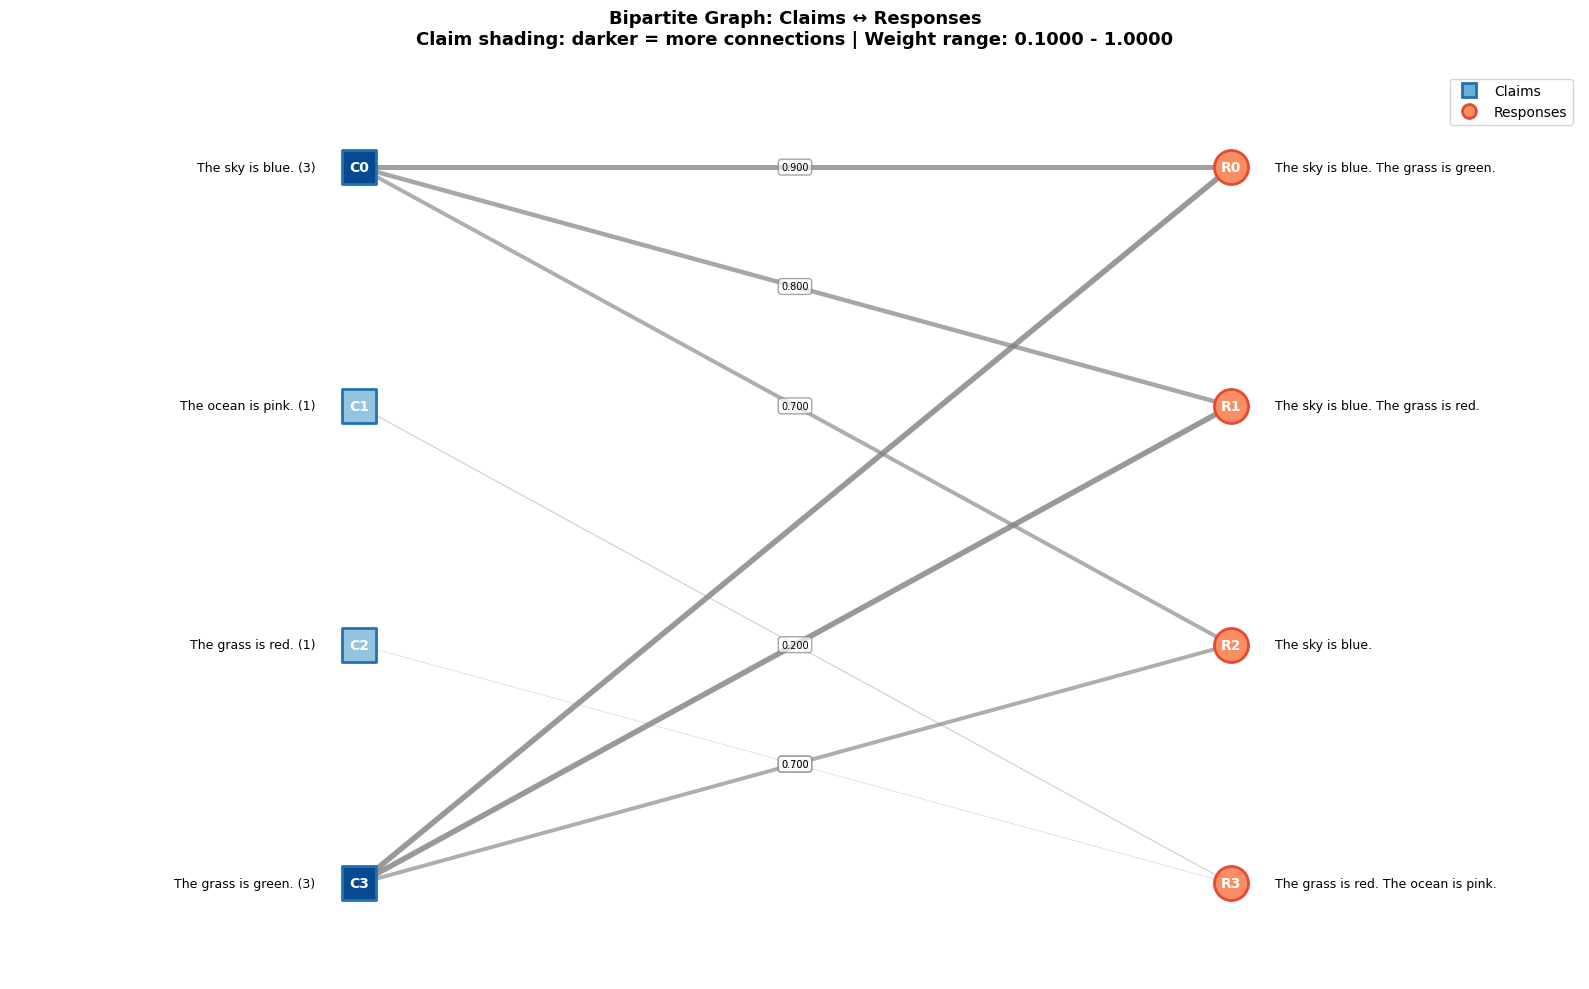

RESULTS
 --------------------
Query 1:
{
    "claim": "The sky is blue.",
    "original_response": true,
    "scores": {
        "degree_centrality": 0.6,
        "betweenness_centrality": 0.08333,
        "closeness_centrality": 0.8,
        "harmonic_centrality": 1.0,
        "page_rank": 0.14588,
        "eigenvector_centrality": 0.88228,
        "katz_centrality": 0.99703,
        "hits_authority": 0.88228
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The ocean is pink.",
    "original_response": false,
    "scores": {
        "degree_centrality": 0.05,
        "betweenness_centrality": 0.0,
        "closeness_centrality": 0.66667,
        "harmonic_centrality": 0.42857,
        "page_rank": 0.12213,
        "eigenvector_centrality": 0.0,
        "katz_centrality": 0.97521,
        "hits_authority": 0.0
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The grass is red.",
    "original_response": false,
    "scores": {
        "degree_centrality": 0.025,
        "betwee

In [5]:
res = await graphuq_scorer.a_evaluate(
    response_sets=responses,
    original_claim_sets=original_claim_sets,
    sampled_claim_sets=sampled_claim_sets,
    entailment_score_sets=entailment_score_sets,
    claim_dedup_method="exact_match",
    use_entailment_prob=True, 
    show_graph=True,
)
print("RESULTS\n","-"*20)
for i, claimscores in enumerate(res):
    print(f"Query {i+1}:")
    for claimscore in claimscores:
        print(claimscore.model_dump_json(indent=4))

You can also start from just original_claim_sets and entailment_score_sets now

In [6]:
res = await graphuq_scorer.a_evaluate(
    original_claim_sets=original_claim_sets,
    entailment_score_sets=entailment_score_sets,
    claim_dedup_method=None,
    use_entailment_prob=False, 
    show_graph=False,
)
print("RESULTS\n","-"*20)
for i, claimscores in enumerate(res):
    print(f"Query {i+1}:")
    for claimscore in claimscores:
        print(claimscore.model_dump_json(indent=4))

uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Inferred 4 responses from entailment scores
uqlm.longform.black_box.graphuq - DEBUG - sampled_claim_sets not provided. Master claims will be inferred from entailment_score_sets keys.
uqlm.longform.black_box.graphuq - DEBUG - Starting evaluation for 1 response sets.
uqlm.longform.black_box.graphuq - DEBUG - Step 1: Deduplicating claims for all response sets...
uqlm.longform.black_box.graphuq - DEBUG - All sampled_claim_sets are empty. Inferring master claims from entailment_score_sets keys.
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Inferred 4 claims from entailment_score_sets keys
uqlm.longform.black_box.graphuq - DEBUG - Step 2: Computing adjacency matrices for all response sets...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Computing entailment scores for master claim set...
uqlm.longform.black_box.graphuq - DEBUG - Executing 0 NLI predictions concurrently...
uqlm.longform.black_box.graphuq - DE

RESULTS
 --------------------
Query 1:
{
    "claim": "The sky is blue.",
    "original_response": true,
    "scores": {
        "degree_centrality": 0.6,
        "betweenness_centrality": 0.08333,
        "closeness_centrality": 0.8,
        "harmonic_centrality": 1.0,
        "page_rank": 0.14588,
        "eigenvector_centrality": 0.88228,
        "katz_centrality": 0.99703,
        "hits_authority": 0.88228
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The grass is green.",
    "original_response": true,
    "scores": {
        "degree_centrality": 0.675,
        "betweenness_centrality": 0.08333,
        "closeness_centrality": 0.8,
        "harmonic_centrality": 1.0,
        "page_rank": 0.16155,
        "eigenvector_centrality": 1.0,
        "katz_centrality": 1.0,
        "hits_authority": 1.0
    },
    "scorer_type": "graphuq"
}
{
    "claim": "The grass is red.",
    "original_response": false,
    "scores": {
        "degree_centrality": 0.025,
        "betweenness_c

Testing 10 queries at once (2 unique queries repeated 5 times each)

In [7]:
responses = [
    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],
    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],    [
        "The sky is blue. The grass is green.",
        "The sky is blue. The grass is red.",
        "The sky is blue.",
        "The grass is red. The ocean is pink.",
    ],
    [
        "She likes to play basketball and soccer.",
        "She likes to play basketball and tennis.",
        "She likes to play basketball and soccer.",
    ],
]

original_claim_set = [
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
    ["The sky is blue.", "The grass is green."],
    ["She likes to play basketball.", "She likes to play soccer."],
]

sampled_claim_sets = [
    [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
        [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
        [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
        [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
        [
        ["The ocean is pink.", "The grass is red."],
        ["The sky is blue.", "The grass is red."],
        ["The sky is blue."],
    ],
    [
        ["She likes to play basketball.", "She likes to play tennis."],
        ["She likes to play basketball.", "She likes to play soccer."],
    ],
]

entailment_score_sets = [{"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]},
                          {"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]},
                          {"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]},
                          {"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]},
                          {"The sky is blue.":[1,1,1,0],
                          "The grass is green.":[1,1,1,0],
                          "The grass is red.":[0,0,0,1],
                          "The ocean is pink.":[0,0,0,1]},
                          {"She likes to play basketball.":[1,1,1],
                           "She likes to play soccer.":[1,0,1],
                           "She likes to play tennis.":[0,1,0]}]

***

**Testing a factscore entry (testing the LongformUQ() integration)**

Here we're starting with just a single query (no pre-computed responses, claim decomp, or nli scores calculated yet)

In [8]:
# GraphUQ Demo - Bipartite Graph-based Uncertainty Quantification
# This notebook demonstrates the GraphUQScorer for claim-level uncertainty quantification
from langchain_google_vertexai import ChatVertexAI
import logging
from uqlm.scorers.longform import LongFormUQ
from uqlm.utils.dataloader import load_example_dataset

# Configure logging to see debug output from uqlm only
logging.basicConfig(level=logging.INFO, format="%(name)s - %(levelname)s - %(message)s")
logging.getLogger("uqlm.longform.black_box.graphuq").setLevel(logging.DEBUG)

# Initialize the LLM and GraphUQScorer
llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0.7)
judge_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0)
nli_llm = ChatVertexAI(model="gemini-2.5-flash", temperature=0, logprobs=True)

# Get data
df = load_example_dataset("factscore")

# initalize uqlm scorer
lfuq = LongFormUQ(llm=llm, 
                  mode="graphuq", 
                  granularity="claim", 
                  aggregation_method="mean", 
                  sampling_temperature=1, 
                  nli_llm=nli_llm, 
                  claim_decomposition_llm=judge_llm)

res = await lfuq.generate_and_score([df.tail(n=1)["factscore_prompt"].iloc[0]], num_responses=2, show_progress_bars=False)
res.to_dict()

Loading dataset - factscore...


uqlm.longform.black_box.graphuq - INFO - Initialized GraphUQScorer


Processing dataset...
Dataset ready!


I0000 00:00:1761945567.907151 7755554 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
uqlm.longform.black_box.graphuq - DEBUG - Starting evaluation for 1 response sets.
uqlm.longform.black_box.graphuq - DEBUG - Step 1: Deduplicating claims for all response sets...
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Initial master claim set size: 0
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0][Iteration 0] Found 91 unique claims
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0][Iteration 0] Adding 91 new claims
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Initial master claim set size: 0
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0][Iteration 1] Found 80 unique claims
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0][Iteration 1] Adding 42 new claims
uqlm.longform.black_box.graphuq - DEBUG - [Response set 0] Master claim set size after dedup: 133
uqlm.longform.black_box.graphuq - D

{'data': {'responses': ['Jennifer Paz is a highly talented Filipino-American actress and singer, widely recognized for her captivating voice work and her distinguished career in musical theater.\n\nHere\'s a look at her bio:\n\n*   **Early Life & Background:** Born in the Philippines, Jennifer Paz moved to the United States at a young age, growing up primarily in California. She developed a passion for performing early on and pursued training in both acting and singing, honing her powerful and expressive voice.\n\n*   **Musical Theater Career:** Paz made a significant impact on the stage, particularly known for her roles in major Broadway productions. Her most iconic stage role was **Kim in *Miss Saigon***, which she performed on Broadway and in the national touring company. This role showcased her incredible vocal range and dramatic acting abilities. Her other notable theater credits include:\n    *   **Eponine** in *Les Misérables*\n    *   **Mei-Li** in Rodgers and Hammerstein\'s *F